###**Import Libraries**

In [1]:
pip install numpy pandas seaborn matplotlib scikit-learn

                                              0.0/15.5 MB ? eta -:--:--
                                              0.0/15.5 MB ? eta -:--:--
                                              0.0/15.5 MB 1.9 MB/s eta 0:00:09
                                              0.1/15.5 MB 1.6 MB/s eta 0:00:10
                                              0.1/15.5 MB 1.0 MB/s eta 0:00:16
                                              0.1/15.5 MB 1.0 MB/s eta 0:00:16
                                              0.3/15.5 MB 1.2 MB/s eta 0:00:13
                                              0.3/15.5 MB 1.1 MB/s eta 0:00:15
                                              0.3/15.5 MB 1.0 MB/s eta 0:00:16
     -                                        0.5/15.5 MB 1.6 MB/s eta 0:00:10
     -                                        0.6/15.5 MB 1.5 MB/s eta 0:00:10
     -                                        0.7/15.5 MB 1.4 MB/s eta 0:00:11
     --                                       0.9/15.5 MB 1.9 MB/s


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###**Fitness Function**

In [11]:
# Common fitness function for GA and PSO


# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\VIVOBOOK\Downloads\Mid-.csv')


# Sample data (Replace these with your actual data)
t = df['TTL']
h = df['Hop_Count']
r = df['rate_of_energy_consumption']

# Fitness function
def fitness_function(ind):
    w1, w2, w3 = ind

    if(w1 < 0.0000001):
      return 9999999
    if(w2 < 0.0000001):
      return 9999999
    if(w3 < 0.0000001):
      return 9999999

    if (w1 + w2 + w3) > 1.0:
        return 9999999

    df['risk_score']= w1 * r + w2 * t + w3 * h

    if any(df['risk_score'] > 100):
        return 999999999
    if(sum(df['risk_score']) < 50):
      return 9999999
    return df['risk_score'].min()


###**Genetic Algorithm**

In [12]:
#Creates a random individual
def individual(ind_size, ind_limits):
    ind = []
    for i in range(ind_size):
        ind.append(random.uniform(ind_limits[i][0], ind_limits[i][1]))
    return ind

In [13]:
#Performs crossover between two parents
def crossover(parent1, parent2):
    if len(parent1) == 1:
        return parent1  # Or you could do some other type of mixing, but with 1 element it's a moot point
    point = random.randint(1, len(parent1) - 1)
    child = parent1[:point] + parent2[point:]
    return child

In [14]:
#Mutates the child
def mutate(child, ind_limits):
    index = random.randint(0, len(child) - 1)
    child[index] = random.uniform(ind_limits[index][0], ind_limits[index][1])
    return child

In [15]:
#Select two parents based on fitness
def select_parents(population, fit_func):
    k = 2
    parent1 = population[0]
    parent2 = max(random.choices(population, k=k), key=fit_func)
    return parent1, parent2

In [17]:



def genetic_algorithm(ind_size, ind_limits, fit_func, pop_size, gen_max):
    population = []
    best_fitnesses = []  # This list will store the best fitness in each generation
    for i in range(pop_size):
        population.append(individual(ind_size, ind_limits))
    for gen in range(gen_max):
        population.sort(key=fit_func)
        best_fitness = fit_func(population[0])  # Take the best individual's fitness
        best_fitnesses.append(best_fitness)  # Add the best fitness to the list
        parent1, parent2 = select_parents(population, fit_func)

        child = crossover(parent1, parent2)
        child = mutate(child, ind_limits)

        # Replace the least fit individual
        population[-1] = child

    # Printing the best individual results for the final results
    best_individual = population[0]



    return best_individual, best_fitnesses

###**Particle Swarm Optimization**

In [18]:
# Initialize a random particle
def particle(ind_size, ind_limits):
    ind = []
    for i in range(ind_size):
        ind.append(random.uniform(ind_limits[i][0], ind_limits[i][1]))
    return ind

In [19]:
# Update velocity
def update_velocity(velocity, pBest_position, gBest_position, particle_position, w, c1, c2):
    new_velocity = []
    for i in range(len(velocity)):
        r1, r2 = random.random(), random.random()
        v = w * velocity[i] + c1 * r1 * (pBest_position[i] - particle_position[i]) + c2 * r2 * (gBest_position[i] - particle_position[i])
        new_velocity.append(v)
    return new_velocity

In [20]:
# Update position
def update_position(particle_position, velocity):
    new_position = []
    for i in range(len(particle_position)):
        pos = particle_position[i] + velocity[i]
        # Ensure positions are within limits
        pos = max(0, min(1, pos))
        new_position.append(pos)
    return new_position

In [21]:
# PSO algorithm
def particle_swarm_optimization(ind_size, ind_limits, fit_func, num_particles, num_iterations):
    w, c1, c2 = 0.1, 0.5, 0.5

    particles = [particle(ind_size, ind_limits) for _ in range(num_particles)]
    velocities = [[random.uniform(-1, 1) for _ in range(ind_size)] for _ in range(num_particles)]

    pBests = particles[:]
    gBest = min(pBests, key=fit_func)
    best_fitnesses = []

    for _ in range(num_iterations):
        for i in range(num_particles):
            # Update personal best
            if fit_func(particles[i]) < fit_func(pBests[i]):
                pBests[i] = particles[i]

            # Update global best
            if fit_func(particles[i]) < fit_func(gBest):
                gBest = particles[i]

            velocities[i] = update_velocity(velocities[i], pBests[i], gBest, particles[i], w, c1, c2)
            particles[i] = update_position(particles[i], velocities[i])

        best_fitness = fit_func(gBest)
        best_fitnesses.append(best_fitness)

    return gBest, best_fitnesses

###**Running Algorithms and Plotting**

In [22]:
def run_algorithms_and_plot(NUM_RUNS, IND_LIMITS, IND_SIZE, pop_size, gen_max, num_particles, num_iterations):
    # Data collection for line chart
    line_data_GA = []
    line_data_PSO = []
    best_fitnesses_all_iterations_GA = []
    best_fitnesses_all_iterations_PSO = []

    best_solution_GA = None
    best_fitness_GA = float('inf')
    best_run_GA = None
    best_gen_GA = None

    best_solution_PSO = None
    best_fitness_PSO = float('inf')
    best_run_PSO = None
    best_iter_PSO = None

    print("Starting GA runs...")
    # Run GA NUM_RUNS times
    for i in range(NUM_RUNS):
        print("\rRunning GA iteration", i+1,NUM_RUNS, end='')
        best_solution, fitness_over_time = genetic_algorithm(IND_SIZE, IND_LIMITS, fitness_function, pop_size, gen_max)
        line_data_GA.append(fitness_over_time)
        best_fitnesses_all_iterations_GA.append(fitness_function(best_solution))
        if fitness_function(best_solution) < best_fitness_GA:
          best_fitness_GA = fitness_function(best_solution)
          best_solution_GA = best_solution
          best_run_GA = i
          best_gen_GA = np.argmin(fitness_over_time)
    print("\nGA runs completed.")
    # Average the fitness over all runs for GA
    avg_line_data_GA = np.mean(line_data_GA, axis=0)
    print("\n\nStarting PSO runs...")
    # Run PSO NUM_RUNS times
    for i in range(NUM_RUNS):
        print("\rRunning PSO iteration", i+1,NUM_RUNS, end='')
        best_particle, fitness_over_time = particle_swarm_optimization(IND_SIZE, IND_LIMITS, fitness_function, num_particles, num_iterations)
        best_fitnesses_all_iterations_PSO.append(fitness_function(best_particle))
        line_data_PSO.append(fitness_over_time)
        if fitness_function(best_particle) < best_fitness_PSO:
           best_fitness_PSO = fitness_function(best_particle)
           best_solution_PSO = best_particle
           best_run_PSO = i
           best_iter_PSO = np.argmin(fitness_over_time)

    print("\nPSO runs completed.\n\n")
    # Average the fitness over all runs for PSO
    avg_line_data_PSO = np.mean(line_data_PSO, axis=0)

# Plotting
    fig1, ax1 = plt.subplots(figsize=(15, 7))
# Line chart for GA and PSO
    plt.plot(avg_line_data_GA, label="GA")
    plt.plot(avg_line_data_PSO, label="PSO")
    plt.title('Generation/Iteration vs. Average Fitness')
    plt.xlabel('Generation/Iteration')
    plt.ylabel('Average Fitness Value')
    plt.legend()
    plt.show()

    fig2, ax2 = plt.subplots(figsize=(15, 7)) # you can adjust this size
    box = plt.boxplot([best_fitnesses_all_iterations_GA, best_fitnesses_all_iterations_PSO],
                  labels=['GA', 'PSO'], patch_artist=True, widths=0.3)
    colors = ['cyan', 'pink']
    for patch, color in zip(box['boxes'], colors):
      patch.set_facecolor(color)
    #plt.xlim(0.3, 2.7)
    plt.gca().set_position([0.1, 0.1, 0.8, 0.8])
    plt.title('Boxplot of Best Fitnesses for Each Iteration')
    plt.ylabel('Fitness Value')
    plt.subplots_adjust(wspace=0.7)  # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()


    print("GA: Best solution is",best_solution_GA, "with fitness ",best_fitness_GA,"Found at run", best_run_GA + 1, "and generation ",best_gen_GA + 1)
    print("PSO: Best solution is", best_solution_PSO, "with fitness", best_fitness_PSO, "Found at run",best_run_PSO + 1, "and iteration",best_iter_PSO + 1)


###**Setting the algorithm parameters**

Starting GA runs...
Running GA iteration 10 10
GA runs completed.


Starting PSO runs...
Running PSO iteration 10 10
PSO runs completed.




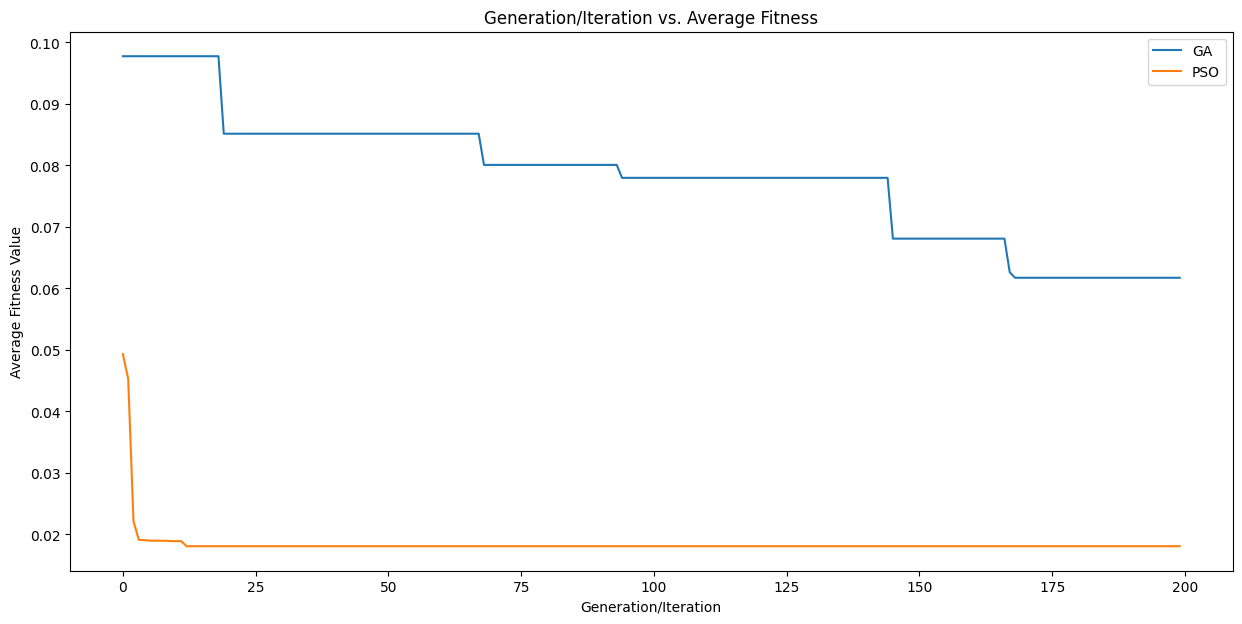

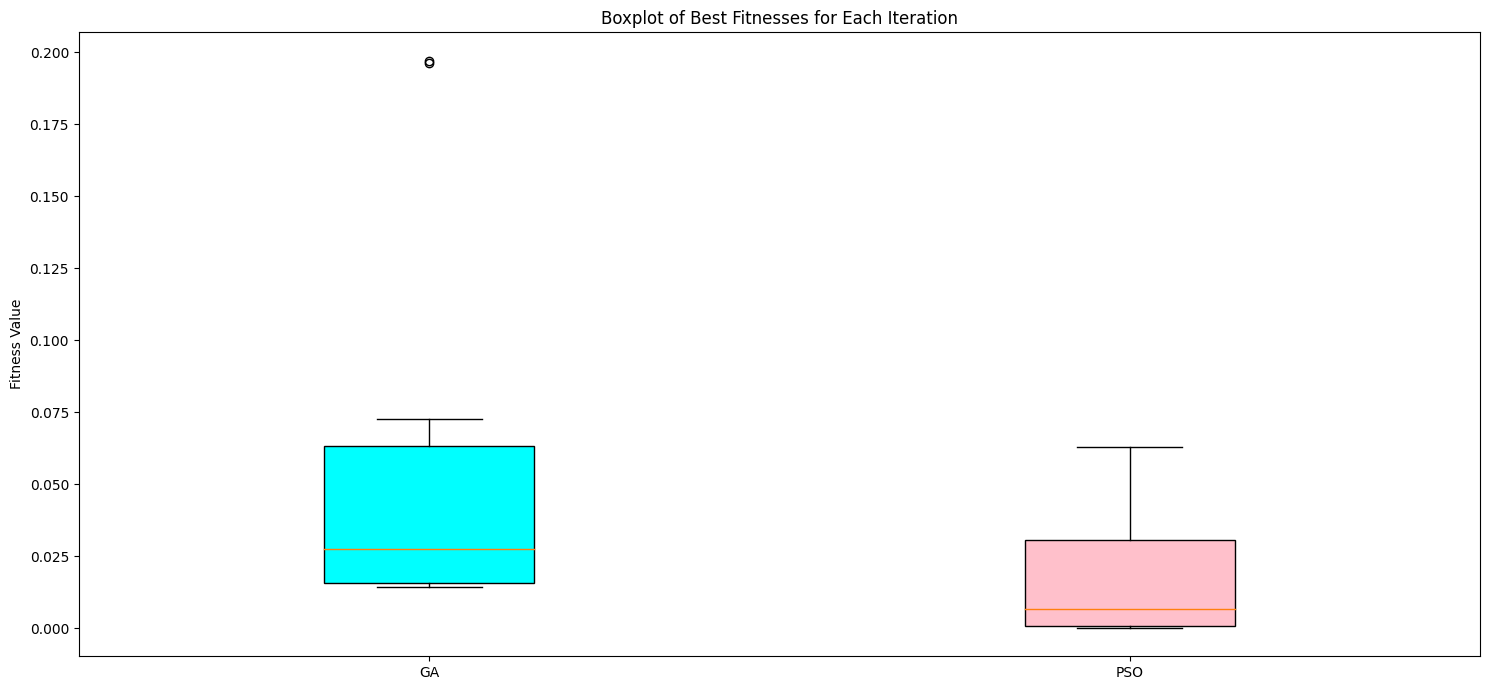

GA: Best solution is [0.3731063275150682, 0.4203753430502135, 0.002859387954866177] with fitness  0.014296939774330886 Found at run 4 and generation  69
PSO: Best solution is [0.3668793528878043, 0.2063029327584945, 2.8694320188071782e-05] with fitness 0.0001434716009403589 Found at run 9 and iteration 24


In [24]:
# Setting the algorithm parameters
NUM_RUNS = 10

IND_LIMITS = [(0, 1), (0, 1),(0, 1)]
IND_SIZE = 3

pop_size = 100
num_particles = 100

gen_max = 200
num_iterations = 200




# Running the algorithms and plotting
run_algorithms_and_plot(NUM_RUNS, IND_LIMITS, IND_SIZE, pop_size, gen_max, num_particles, num_iterations)

In [25]:
ndf = df[df['risk_score']>=0.0001434716009403589]
ndt = len(ndf[ndf['behaviour']=='Under attack'].index)/len(ndf)*100
print(ndt)

15.78149731181073


In [33]:
ndf = df[df['risk_score']>=1]
ndt = len(ndf[ndf['behaviour']=='Under attack'].index)/len(ndf)*100
print(ndt)

16.07504953573685


In [34]:
ndf = df[df['risk_score']>=5]
ndt = len(ndf[ndf['behaviour']=='Under attack'].index)/len(ndf)*100
print(ndt)

16.271575508762638


In [35]:
ndf = df[df['risk_score']>=10]
ndt = len(ndf[ndf['behaviour']=='Under attack'].index)/len(ndf)*100
print(ndt)

17.5


In [36]:
ndf = df[df['risk_score']>=20]
ndt = len(ndf[ndf['behaviour']=='Under attack'].index)/len(ndf)*100
print(ndt)

18.181818181818183


In [72]:
ndf = df[df['risk_score']>=15.555]
ndt = len(ndf[ndf['behaviour']=='Under attack'].index)/len(ndf)*100
print(ndt)

46.875
